# The Example Code From Qiskit
https://qiskit.org/textbook/ch-states/representing-qubit-states.html

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [2]:
qc = QuantumCircuit(1) # Create a quantum circuit with one qubit

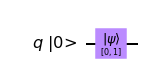

In [3]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.draw(output = 'mpl', initial_state=True)  # Let's view our circuit

In [4]:
sim = Aer.get_backend('aer_simulator')  # Tell Qiskit how to simulate our circuit

In [5]:
qc = QuantumCircuit(1)  # Create a quantum circuit with one qubit
initial_state = [0,1]   # Define initial_state as |1>
qc.initialize(initial_state, 0) # Apply initialisation operation to the 0th qubit
qc.save_statevector()   # Tell simulator to save statevector
qobj = assemble(qc)     # Create a Qobj from the circuit for the simulator to run
result = sim.run(qobj).result() # Do the simulation and return the result

In [6]:
out_state = result.get_statevector()
print(out_state) # Display the output state vector

Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


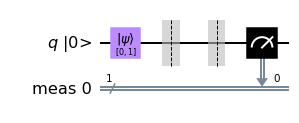

In [7]:
qc.measure_all()
qc.draw(output = 'mpl', initial_state=True)

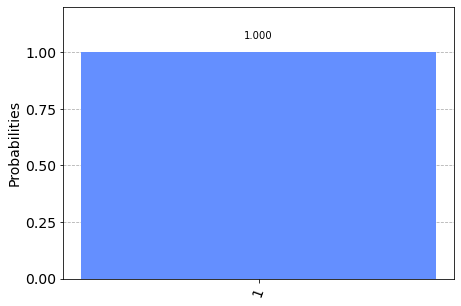

In [8]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)

## State of complex qubit

In [9]:
initial_state = [1/sqrt(2), 1j/sqrt(2)]  # Define state |q_0>

In [10]:
qc = QuantumCircuit(1) # Must redefine qc
qc.initialize(initial_state, 0) # Initialize the 0th qubit in the state `initial_state`
qc.save_statevector() # Save statevector
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector() # Execute the circuit
print(state)           # Print the result

Statevector([0.70710678+0.j        , 0.        +0.70710678j],
            dims=(2,))


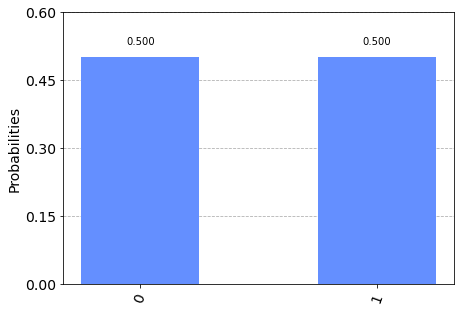

In [11]:
qobj = assemble(qc)
results = sim.run(qobj).result().get_counts()
plot_histogram(results)

## The Observer Effect

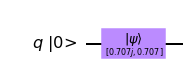

In [12]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw(output = 'mpl', initial_state=True)

In [13]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.        +0.70710678j, 0.70710678+0.j        ],
            dims=(2,))


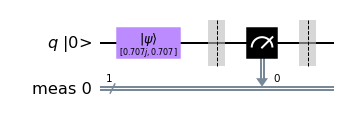

In [14]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw(output = 'mpl', initial_state=True)

In [15]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


## Bloch Sphere

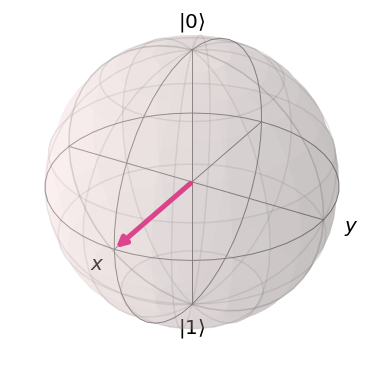

In [33]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

# Exercises

## Q1
    * Create a state vector that will give a 1/3  probability of measuring |0>
    * Create a different state vector that will give the same measurement probabilities.
    * Verify that the probability of measuring  |1⟩  for these two states is 2/3 .

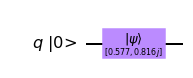

In [34]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state_ex = [1/sqrt(3), 1.j*sqrt(2)/sqrt(3)]
qc.initialize(initial_state_ex, 0)
qc.draw(output = 'mpl', initial_state=True)

In [35]:
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = Statevector([0.57735027+0.j        , 0.        +0.81649658j],
            dims=(2,))


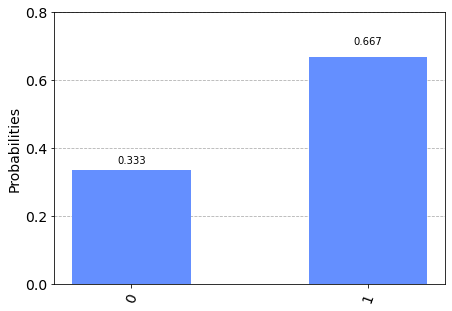

In [36]:
qobj = assemble(qc)
result = sim.run(qobj).result()
counts = result.get_counts()
plot_histogram(counts)